In [1]:
pip install folktables

Note: you may need to restart the kernel to use updated packages.


In [2]:
state_list = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
              'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
              'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
              'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
              'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR']

In [3]:
# Specify here which state and year the model should be trained (and tested) on
training_state = 'PA'
training_year = 2014
training_horizon = '1-Year'
# For task 6: Specify here in which state and when the model should be deployed
deployment_state = 'PA'
deployment_year = 2018
deployment_horizon = '1-Year'

task6 = False
if task6:
    training_state = deployment_state
    training_year = deployment_year
    training_horizon = deployment_horizon

# Setup

## Get training and testing data

In [4]:
def preprocess_data(features, label, group):
  # Age
  ix_right_age_group = (features[:,0]>=25) & (features[:,0]<=65)
  features = features[ix_right_age_group]
  label = label[ix_right_age_group]
  group = group[ix_right_age_group]
  # Race
  ix_bw = (group==1) | (group==2)
  features = features[ix_bw]
  label = label[ix_bw]
  group = group[ix_bw]

  return (features, label, group)

In [5]:
from folktables import ACSDataSource, ACSEmployment
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data_source = ACSDataSource(survey_year=training_year, horizon=training_horizon, survey='person')
acs_data = data_source.get_data(states=[training_state], download=True)
features, label, group = ACSEmployment.df_to_numpy(acs_data)
features, label, group = preprocess_data(features, label, group)

### How successful are the job coaches?
Base rate: Probability of finding employment within the first year of working with the job coaches

In [6]:
np.mean(label)

0.710184182015168

## Train the model

In [7]:
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    features, label, group, test_size=0.2, random_state=0)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Make predictions

In [8]:
yhat = model.predict(X_test)
scores = model.predict_proba(X_test)[:,1]

# Task 1

Accuracy =  0.7649744621575607
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


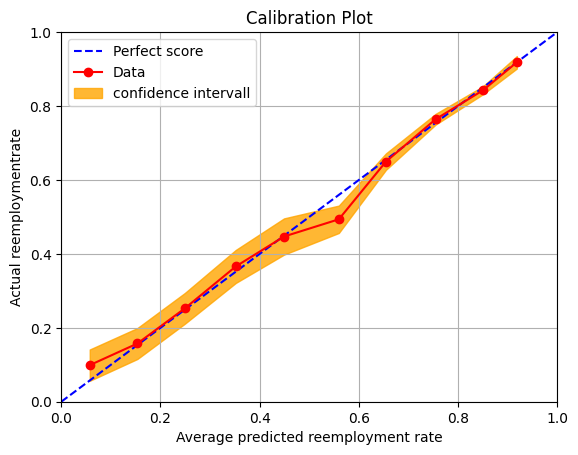

In [10]:
y_pred_test = model.predict (X_test)

diagonal = 0
total = 0
for idx , ele in enumerate (y_pred_test):
    if y_test [idx]== y_pred_test [idx]:
      diagonal +=1
    total +=1
print ("Accuracy = ", diagonal / total)

#the Accuracy is: 76.497%

import matplotlib.pyplot as plt
from scipy import stats
# Perfect calibration score
perfect = np.arange (0 ,1.1 ,0.1)
x = perfect [:10]+0.05 # 0.05 is added such that the plot bins the
#center of the bin
print ( x )
avg = np.empty (10)
yavg = np.empty(10)
conf_interval_lower = np.empty (10)
conf_interval_upper = np.empty (10)

# bins
bins = [[] for _ in range (10)]
ybins = [[] for _ in range (10)]
# calculate average score for each bin
for i, score in enumerate(scores) :     
  idx = int (score *10)
  bins[idx].append(score)
  ybins[idx].append(y_test[i])

conf_up = []
conf_low = []


for i in range (len (ybins)):
  avg [i] = np.mean (np.array (bins [i]))
  stderr = stats.sem (np.array (ybins [i]))
  yavg[i] = np.mean (np.array (ybins [i]))
  intervall =  stats.norm.interval(confidence = 0.95, loc = yavg[i], scale = stderr)
  conf_up.append(intervall[0])
  conf_low.append(intervall[1])

plt.plot(perfect , perfect , "b--", label = "Perfect score")
plt.plot (avg , yavg, "r-o", label = "Data")
plt.fill_between(avg , conf_low , conf_up , color= 'orange' , alpha =.8 , label = "confidence intervall")
plt.legend(loc = 'upper left')
plt.xlabel ("Average predicted reemployment rate")
plt.ylabel ("Actual reemploymentrate")
plt.title("Calibration Plot")
plt.xlim (0 ,1)
plt.ylim (0 ,1)
plt.grid()

# Task 2

Baserate white:  0.8808467910635093
Baserate black:  0.666323377960865 

Positive rate white:  0.7228683792151284
positive rate black:  0.537590113285273 

True positive rate white:  0.7791393559418638
True positive rate black:  0.6908809891808346 

False negative rate white:  0.22086064405813624
False negative rate black:  0.30911901081916543 

False postivie rate white:  0.3068820224719101
False positive rate black:  0.23148148148148145 

True negative rate white:  0.6931179775280898
True negative rate rate black:  0.7685185185185185 



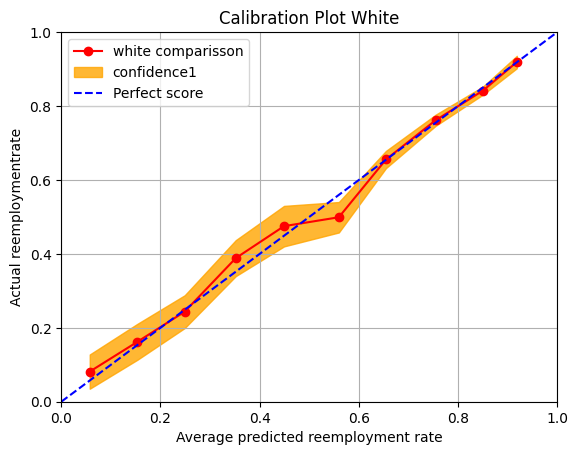

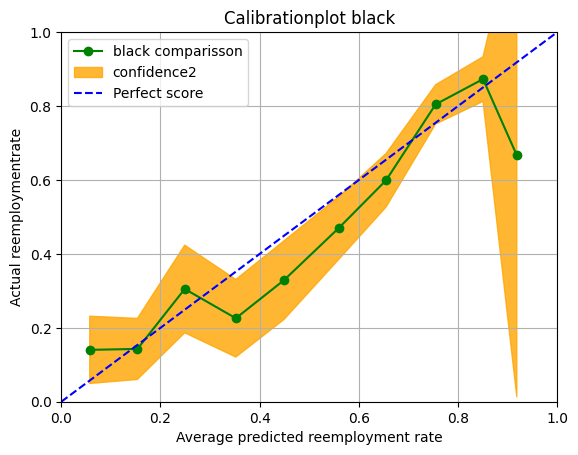

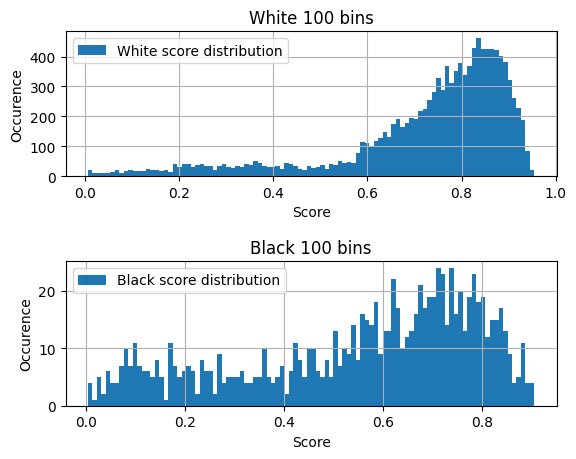

In [15]:
bins1 = [[] for _ in range(10)]
bins2 = [[] for _ in range(10)]

actualbins1 = [[] for _ in range(10)]
actualbins2 = [[] for _ in range(10)]

avg1 = np.empty(10)
avg2 = np.empty(10)

actualavg1 = np.empty(10)
actualavg2 = np.empty(10)

# calculate average score for each bin
for i, score in enumerate(scores):
    idx = int(score*10)
    if score == 1: 
        if X_test[i][15] == 1:
            bins1[9].append(score)
            actualbins1[9].append(y_test[i])
        else:
            bins2[9].append(score)
            actualbins2[9].append(y_test[i])
        continue
    if X_test[i][15] == 1:
        bins1[idx].append(score)
        actualbins1[idx].append(y_test[i])
    else:
        bins2[idx].append(score)
        actualbins2[idx].append(y_test[i])

conf_low_1 = []
conf_up_1 = []
conf_low_2 = []
conf_up_2 = []

for i in range(len(bins1)):
    avg1[i] = np.mean(np.array(bins1[i]))
    avg2[i] = np.mean(np.array(bins2[i]))
    
    actualavg1[i] = np.mean(np.array(actualbins1[i]))
    actualavg2[i] = np.mean(np.array(actualbins2[i]))
    stderr_1 = stats.sem(np.array(actualbins1[i]))
    stderr_2 = stats.sem(np.array(actualbins2[i]))
    intervall = stats.norm.interval(confidence=0.95, loc=actualavg1[i], scale=stderr_1)
    conf_up_1.append(intervall[0])
    conf_low_1.append(intervall[1])
    intervall = stats.norm.interval(confidence=0.95, loc=actualavg2[i], scale=stderr_2)
    conf_up_2.append(intervall[0])
    conf_low_2.append(intervall[1])

# Plots
plt.figure(1)
plt.plot(avg, actualavg1, "r-o", label = "white comparisson")
plt.fill_between(avg, conf_low_1, conf_up_1, color="orange", alpha=.8, label= "confidence1")
plt.plot(perfect , perfect , "b--", label = "Perfect score")
plt.title("Calibration Plot White")
plt.grid()
plt.xlim (0 ,1)
plt.ylim (0 ,1)
plt.xlabel ("Average predicted reemployment rate")
plt.ylabel ("Actual reemploymentrate")
plt.legend()

plt.figure(2)
plt.plot(avg, actualavg2, "g-o", label = "black comparisson")
plt.fill_between(avg, conf_low_2, conf_up_2, color="orange", alpha=.8, label= "confidence2")
plt.plot(perfect , perfect , "b--", label = "Perfect score")
plt.title("Calibrationplot black")
plt.grid()
plt.xlim (0 ,1)
plt.ylim (0 ,1)
plt.xlabel ("Average predicted reemployment rate")
plt.ylabel ("Actual reemploymentrate")
plt.legend()

#White:
N00_w = 0
N01_w = 0
N10_w = 0
N11_w = 0
scores_w = []

# black
N00_b = 0
N01_b = 0
N10_b = 0
N11_b = 0
scores_b = []

for i in range(len(X_test)):
    # white
    if X_test[i][15] == 1:
        scores_w.append(scores[i])
        # prediction = 1
        if yhat[i]:
            if y_test[i]:
                N11_w +=1
            else: N01_w +=1
        # prediction = 0
        else: 
            if y_test[i]:
                N10_w +=1
            else: N00_w +=1
    #black
    else:
        scores_b.append(scores[i])
        # prediction = 1
        if yhat[i]:
            if y_test[i]:
                N11_b +=1
            else: N01_b +=1
        # prediction = 0
        else: 
            if y_test[i]:
                N10_b +=1
            else: N00_b +=1
N_w = N00_w + N01_w + N10_w + N11_w

p00_w = N00_w/N_w
p01_w = N01_w/N_w
p10_w = N10_w/N_w
p11_w = N11_w/N_w

B_w = N00_b + N01_b + N10_b + N11_b
p00_b = N00_b/B_w
p01_b = N01_b/B_w
p10_b = N10_b/B_w
p11_b = N11_b/B_w

# Plot distributions
binsplot_w = 100
binsplot_b = 100
plt.figure(3)
plt.subplot(211)
plt.hist(scores_w,bins=binsplot_w, label="White score distribution")
plt.grid()
plt.legend()
plt.title(f"White {binsplot_w} bins")
plt.xlabel("Score")
plt.ylabel("Occurence")
plt.tight_layout(pad=3.0)

plt.subplot(212)
plt.hist(scores_b,bins=100, label="Black score distribution")
plt.grid()
plt.legend()
plt.title(f"Black {binsplot_b} bins")
plt.xlabel("Score")
plt.ylabel("Occurence")



# Baserate: 
print("Baserate white: ", p11_w+p01_w)
print("Baserate black: ", p11_b+p01_b, "\n")

# Posrate
print("Positive rate white: ", p11_w+p10_w)
print("positive rate black: ", p11_b+p10_b, "\n")

# True positive rate: TPR
print("True positive rate white: ", p11_w/(p01_w+p11_w))
print("True positive rate black: ", p11_b/(p01_b+p11_b), "\n")

# FNR
print("False negative rate white: ", p01_w/(p01_w+p11_w))
print("False negative rate black: ", p01_b/(p01_b+p11_b), "\n")

# FPR
print("False postivie rate white: ", p10_w/(p00_w+p10_w))
print("False positive rate black: ", p10_b/(p00_b+p10_b), "\n")

# TNR
print("True negative rate white: ", p00_w/(p00_w+p10_w))
print("True negative rate rate black: ", p00_b/(p00_b+p10_b), "\n")



# Task 3

In [13]:
increment = 0.01
vals = np.arange(0,1+increment, increment)

maximum = -2000000000
best_thresh = -1

for threshold in vals: 
    curr = 0
    for i in range(len(X_test)):
        if scores[i]>threshold:
            if y_test[i] == 0:
                curr -=80
            else: curr -=50
        else: curr -=60
    if curr > maximum:
        maximum = curr
        best_thresh = threshold

print(maximum)
print(best_thresh)


-734220
0.66


# Task 4

DS Matrix 

Reference Case: Y=0, D=0: The applicant dosnt get a Jobcoach and therefore also does not get a Job -> v00 = 0

Reference Case 2: Y=1, D=1: The applicant does get a jobcoach and after 1 year of working with him he gets a job.  -> v11 = 10

Case 3: Y=0, D=1, The applicant does get a Jobcoach but sadly does not get a job after working with him -> v01 = +2 Reason: The main benefit of the job coach is not getting a jobcoach but getting a job. Therefore its better than nothing that the individual got a jobcoach because he maybe learned stuff that helps him in the future to get a job but the utility is not nearly as good as of someone really getting a job. 

Case 4: Y=1, D=0, The applicant would get a job if he would have worked with the jobcoach, but he didnt get assigned one and therefore misses the chance of getting a job -> v01 = 0. 




# Task 5

In [47]:
threshold = 0.66
D = scores[:]>=threshold

sensitive_attribute = X_test.T[15][:]==1


data_collection = np.array([yhat, sensitive_attribute,  scores, D]).T
file_name = 'input_for_fairlab.csv'
headerstring = "Y,sensitive-attribute,scores,D"
np.savetxt(file_name, data_collection, delimiter=',', fmt='%d', header=headerstring, comments='')


# Task 6

In [ ]:
data_source_deploy = ACSDataSource(survey_year=deployment_year, horizon=deployment_horizon, survey='person')
acs_deploy = data_source_deploy.get_data(states=[deployment_state], download=True)
features_deploy, label_deploy, group_deploy = ACSEmployment.df_to_numpy(acs_deploy)

yhat_deploy = model.predict(features_deploy)
scores_deploy = model.predict_proba(features_deploy)[:,1]